### Samuel Oluwatayo Alajo

### Heart Disease Predictions Using Supervised Learning

### About Peterside Hospital 


Peterside Hospital is a prestigious private hospital founded in 2000, located in Lagos, Nigeria. They offer a wide variety of medical services and are equipped with state-of-the-art facilities and highly-skilled medical professionals. The hospital has multiple specialized clinics addressing various medical conditions such as diabetes, fertility, heart problems, and cancer.

### Project Overview

As a Data Scientist, the objective of this project is to develop a supervised learning model that can predict the likelihood of a person having heart disease based on given features. 

### Dataset

The dataset provided, `heart.csv`, consists of 303 records and 14 columns, including the target variable. The features encompass several important factors related to heart disease:

- Age
- Sex
- Chest Pain Type (cp)
- Resting Blood Pressure (trestbps)
- Serum Cholesterol (chol)
- Fasting Blood Sugar (fbs)
- Resting Electrocardiographic Results (restecg)
- Maximum Heart Rate Achieved (thalach)
- Exercise-induced Angina (exang)
- ST Depression Induced by Exercise Relative to Rest (oldpeak)
- Slope of the Peak Exercise ST Segment (slope)
- Number of Major Vessels Colored by Flourosopy (ca)
- Thalassemia (thal)


## Goal

The goal is to build a machine learning model that can accurately predict the probability of a person developing heart disease based on the provided dataset. The project will involve preprocessing the data, visualizing the data,feature selection, exploring and selecting appropriate machine learning algorithms, and evaluating the performance of the model. This solution aims to help medical professionals make well-informed decisions and provide better patient care. 



In [1]:
# Import all necessary libraries


# For Data Analysis
import pandas as pd
import numpy as np


# For Data Visyualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix



import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv(r'/Users/mac/Downloads/heart.csv')

In [3]:
# Print the top rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Print the bottom rows
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Dimensionality of the data - The number of rows and columns

data.shape

(303, 14)

### Features in the dataset and meaning:
- age - age in years
- sex - (1= male, 0=female)
- cp - chest pain type(1= typical angina, 2= atypical angina, 3= non-anginal pain 4= asymptomatic)
- testips - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1= true, 0= false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1=yes, 0=no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vesssels(0-3) colored by fluoroscopy
- thal - 3= normal, 6= fixed defect, 7= reversable defect
- target - have disease or not (1=yes, 0=no)

In [6]:
# To improve data comprehension and optimize analysis flow, I will relabel a few of the columns

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Data Verification - Data type, Number of features and rows, Missing data, etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
# Statistical Analysis of the Dataset
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Check for missing values in the dataset

null_vals = data.isnull().sum()
null_vals

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

<AxesSubplot:>

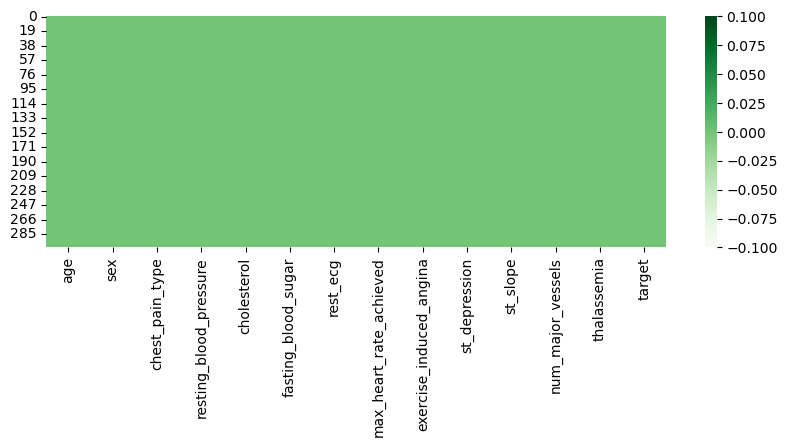

In [10]:
# Visualize missing values using heatmap

plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap= 'Greens')

In [11]:
# Check for duplicate(s)

data.duplicated().sum()

1

In [12]:
# Display where the duplicated row exists in the data

data[data.duplicated()]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
# Drop the duplicated row

data.drop_duplicates(inplace=True)
data.shape

(302, 14)

### Exploratory Data Analysis

### Univariate Analysis

In [14]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<AxesSubplot:xlabel='thalassemia'>

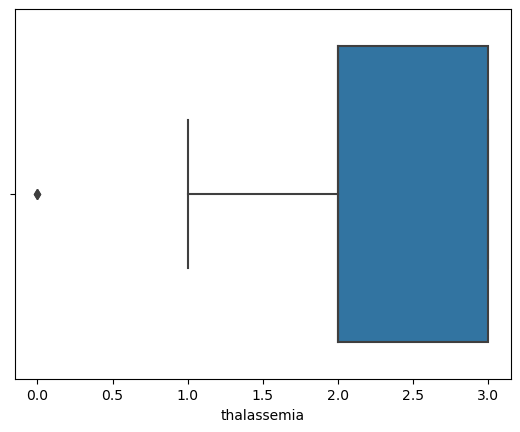

In [15]:
# Check for outliers

sns.boxplot(x=data['thalassemia'])

### Narration:


The boxplot provides a visual representation of the data, highlighting the presence of an outlier at the starting point, which is 0.0. The first quartile (Q1) stands at 2.0, indicating that 25% of the data points are below this value. Similarly, the third quartile (Q3) is at 3.0, signifying that 75% of the observations are beneath this threshold. Additionally, the minimum value in the dataset is 1.0, which is the lowest data point excluding the  outlier at 0.0.

<AxesSubplot:xlabel='cholesterol'>

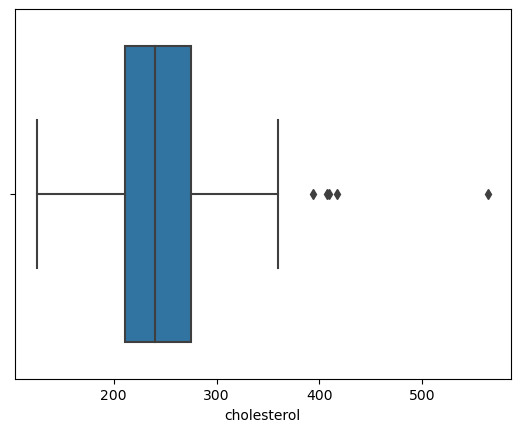

In [16]:
# Check for outliers

sns.boxplot(x=data['cholesterol'])

### Narration:


This boxplot displays a range of data points, including four that are deemed outliers due to their position relative to the rest of the dataset around 380 to 600



 Q1: The 1st quartile (Q1) is located at the 210 mark, which means that 25% of the dataset has a value equal to or lower than 210. 

 Q2: The median, located at the 250 mark, is the central point which divides the distribution into two equal halves; 50% lies above 250, and 50% below it. 

 Q3: The 3rd quartile (Q3) is situated at the 280 mark, meaning that 75% of the dataset is equal to or lower than 280. 
 
 
Lower and Upper Extremes: The lowest and highest values in the dataset, excluding outliers, are approximately somewhere around 120 and 370, respectively. These extremes represent the minimum and maximum values within the typical range of the dataset.


<AxesSubplot:xlabel='resting_blood_pressure'>

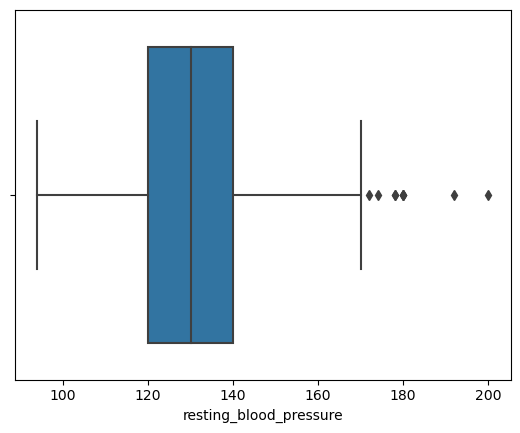

In [17]:
# Check for outliers

sns.boxplot(x=data['resting_blood_pressure'])

### Narration:


The boxplot above shows the presence of outliers, after the highest number 170 to 200. The Q3 is 140 while the 25th percentile is 120 the median point of the data which is the midpoint is 130 the highest value in the dataset is 170 and lowest is around 90

<AxesSubplot:xlabel='max_heart_rate_achieved'>

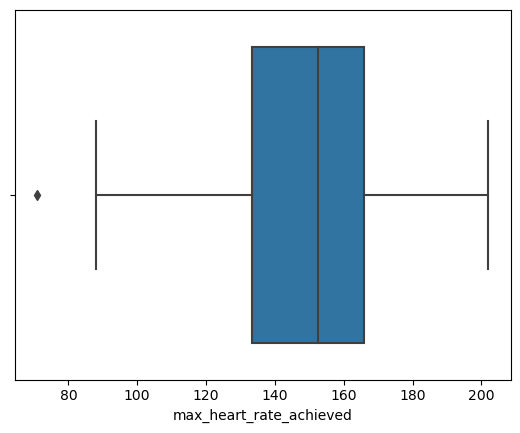

In [18]:
# Check for outliers

sns.boxplot(x=data['max_heart_rate_achieved'])


### Narration:

The boxplot above shows the presence of an outlier location around 70. The Q3 of the data is situated at 170 while the 25th percentile is 135, the midpoint of the data median is 155. The highest value in the data set 200 and the lowest is around 90

Text(0.5, 1.0, 'Total Number Of Patients')

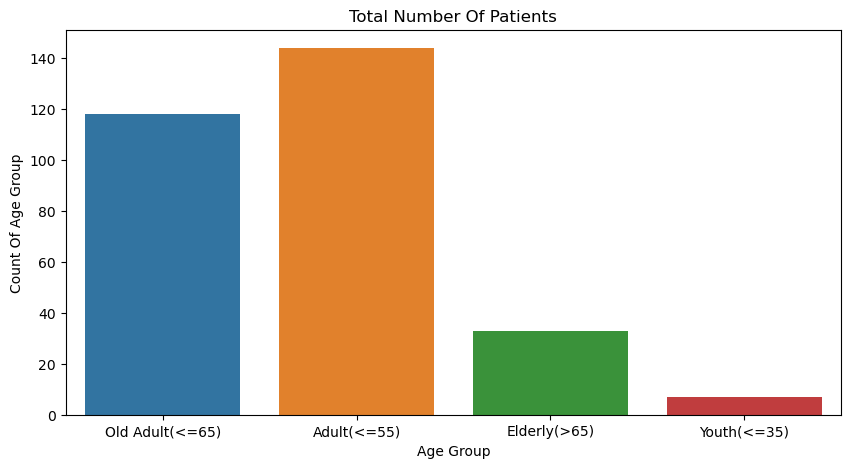

In [19]:
# Data Visualization
# Age_bracket

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
    
data['age_bracket'] = data['age'].apply(age_bracket)




# Investigating the age group of patients

plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=data)
plt.xlabel('Age Group')
plt.ylabel('Count Of Age Group')
plt.title('Total Number Of Patients')
    
    

### Narration:


Based on the age group chart, the Adult Age Group (<=55) has the highest number of patients, followed by the Old Adult Age Group (<=65), the Elderly Age Group (>65), and finally the Youth Age Group (<=35) with the lowest number of patients.

Text(0.5, 1.0, 'Total Number Of Patients')

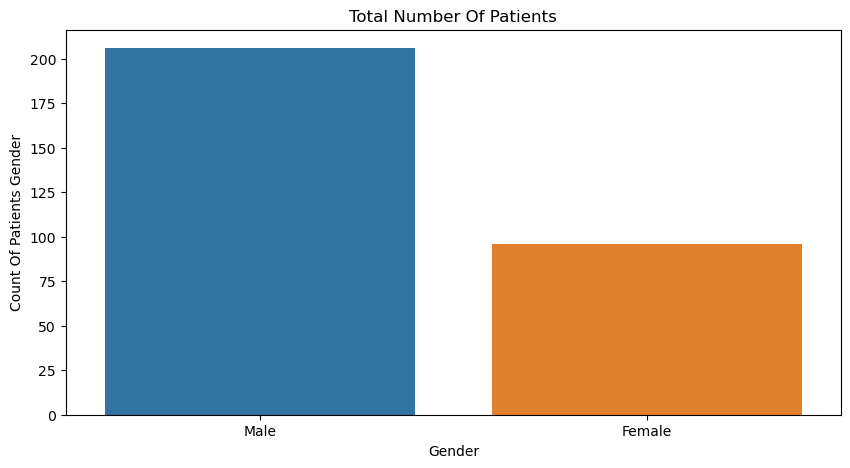

In [20]:
# Data Visualization
# Sex

def gender(sex):
    if sex ==1:
        return 'Male'
    else:
        return 'Female'
    
data['gender'] = data['sex'].apply(gender)

# Investigating the gender of patients

plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Count Of Patients Gender')
plt.title('Total Number Of Patients')

### Narration:
The number of male patients is more than the number of female patients

Text(0.5, 1.0, 'Total Number Of Patients')

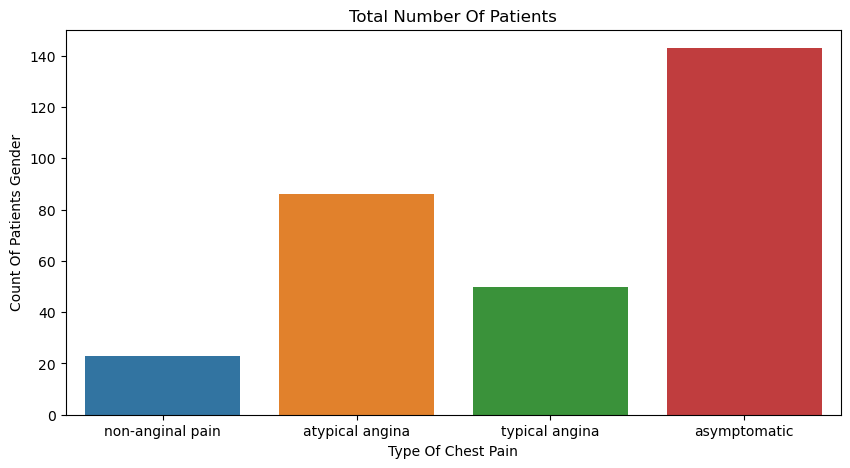

In [21]:
# Data Visualization
# Chest_pain_type 1= typical angina, 2= atypical angina, 3= non-angimal pain, 4= asymptomatic 


def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'
    
data['cp_cat'] = data['chest_pain_type'].apply(chest_pain)





# Investigating the gender of patients

plt.figure(figsize = (10, 5))
sns.countplot(x='cp_cat', data=data)
plt.xlabel('Type Of Chest Pain')
plt.ylabel('Count Of Patients Gender')
plt.title('Total Number Of Patients')

### Narration:

Majority of the patients have asymptomatic chest pain, followed by atypical angina, typical angina, and non anginal pain.

Yes    164
No     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number Of Patients')

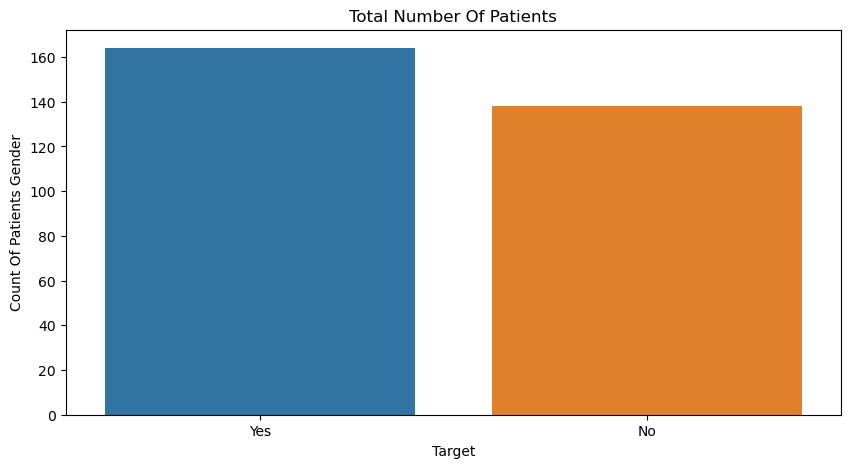

In [22]:
# Data Visualization
# Target - have disease or not(1=yes, 0=no) 


def label(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'
    
data['label'] = data['target'].apply(label)

#Total patients in each category
print(data['label'].value_counts())



# Investigating the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='label', data=data)
plt.xlabel('Target')
plt.ylabel('Count Of Patients Gender')
plt.title('Total Number Of Patients')

### Narration:

Majority of the patients have heart disease, (164) Yes, while 138 does not have heart disease (No)

### Bivariate Analysis

Text(0.5, 1.0, 'Total Number Of Patients')

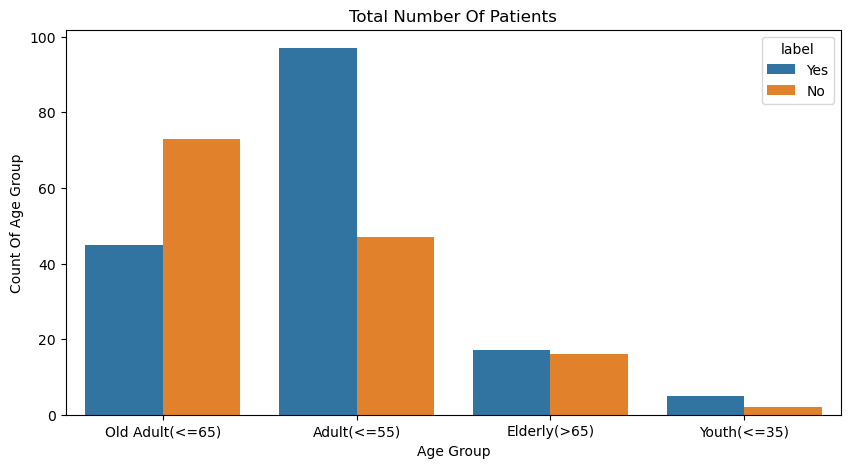

In [23]:
# Investiagating the age group of patients by the target feature

plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=data, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count Of Age Group')
plt.title('Total Number Of Patients')

### Narration:


Here we could see that the Adult Age Group (<=55) has the highest heart problem, followed by the Old Adult(<=65) then the Ederly(>65) and lastly the Youth Age Group.

Text(0.5, 1.0, 'Total Number Of Patients')

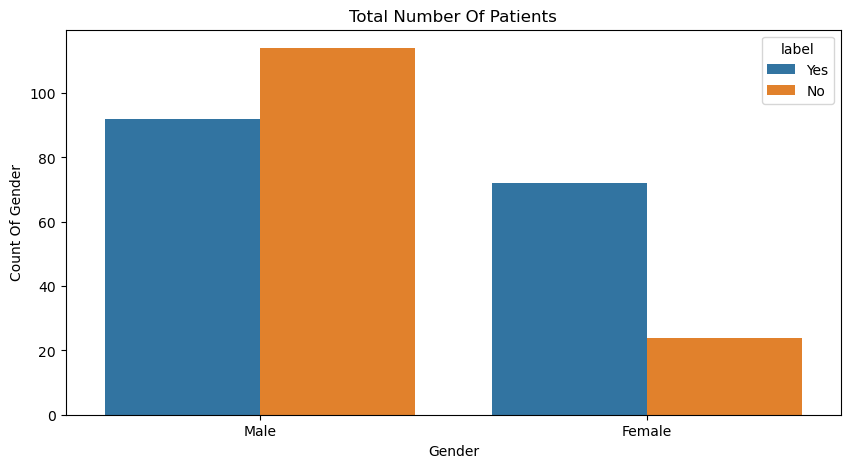

In [24]:
# Investiagating the gender of patients by the target feature

plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=data, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count Of Gender')
plt.title('Total Number Of Patients')

### Narration:

Based on the chart, the gender with the highest number of "Yes" and "No" responses is males.

Text(0.5, 1.0, 'Total Number Of Patients')

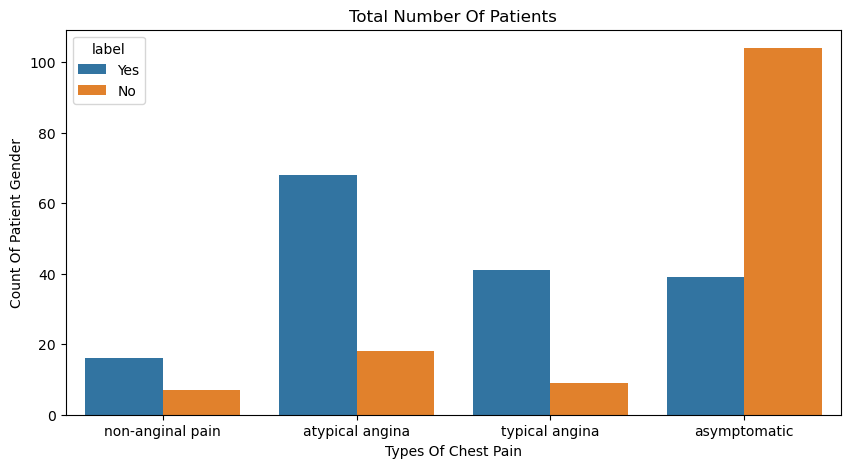

In [25]:
# Investigating the age gender of patients by the target feature


plt.figure(figsize = (10, 5))
sns.countplot(x='cp_cat', data=data, hue='label')
plt.xlabel('Types Of Chest Pain')
plt.ylabel('Count Of Patient Gender')
plt.title('Total Number Of Patients')

### Narration:


A significant number of patients have been displaying symptoms that are associated with heart disease. However, majority of the patients have been diagnosed with different type of chest pain, namely non-anginal pain, atypical angina, typical angina, and asymptomatic. 


It is crucial to identify patients with atypical symptoms, as their diagnosis and treatment may differ from those with typical symptoms. Moreover, asymptomatic patients should be monitored closely to detect any potential issues early on as well as non-angimal.


In [26]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


### Multivariate Analysis

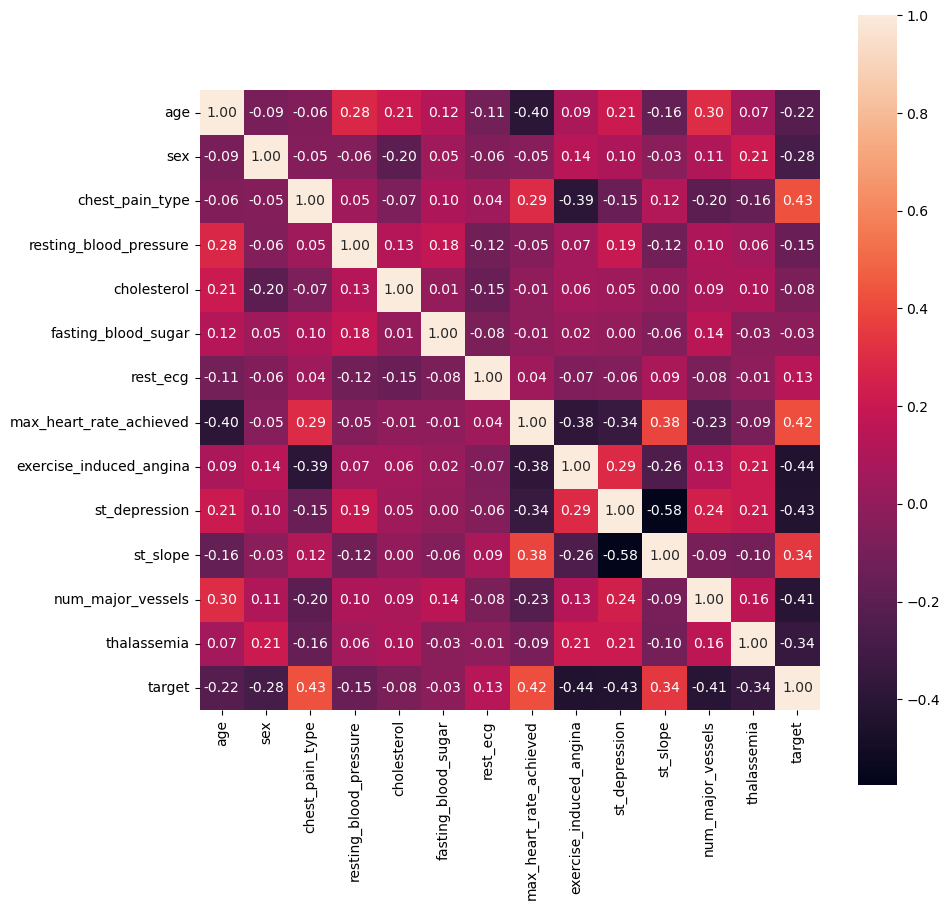

In [27]:
# Correlation between SalePrice and other variable in the dataset

plt.figure(figsize = (10,10))

hm = sns.heatmap(data.corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws= {'size': 10})

### Narration:

The table presents correlation coefficients between various variables in the dataset. Correlation coefficients can range from -1 (indicating a perfect negative correlation) to +1 (indicating a perfect positive correlation), with 0 indicating no correlation at all.

According to the table, age and sex both have weak negative correlations of -0.22 and -0.28, respectively, indicating that as age and sex increase, the likelihood of having heart disease decreases slightly. Chest pain type, on the other hand, has a weak positive correlation of 0.43, meaning that as chest pain increases, the probability of heart disease also increases slightly.

Resting_blood_pressure has a weak negative correlation of -0.15, indicating that as resting blood pressure increases, the likelihood of heart disease decreases slightly.

Cholesterol, however, has an extremely weak correlation of -0.08, suggesting that there is little or no linear relationship between cholesterol levels and heart disease.

The res_ecg variable has a weak positive correlation of 0.13, indicating that there is a slight relationship between resting electrocardiographic results and heart disease.

Max_heart_rate_achieved, st_slope, have positive correlations of 0.42, 0.34, respectively. 

Exercise-induced_angina has a weak negative correlation of -0.44, indicating that as the presence of exercise-induced angina increases, the likelihood of heart disease decreases slightly.

St_depression has a negative correlation of -0.43, suggesting that there is a relationship between St depression, which is measured on an electrocardiogram, and heart disease. Finally, 

num_major_vessels variable has a negative correlation of -0.41, meaning that as the number of major vessels decreases, the likelihood of heart disease increases slightly.


Thalassemia has a weak negative correlation of -0.34, implying that as thalassemia increases, the likelihood of heart disease decreases slightly. Meanwhile, fasting blood sugar has a very negative correlation, suggesting that higher levels of fasting blood sugar are associated with a decreased likelihood of heart disease.


The target variable has a perfect correlation, indicating that it is the dependent variable and is perfectly correlated with the independent variables. This table provides valuable insights into the relationships between different variables and can help in the prediction and prevention of heart disease.





### Feature Engineering

In [28]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


In [29]:
# Create a copy of the data(Exclude target/Label alongside other columns that was created)

data1= data[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia']]

label = data[['target']]

In [30]:
data1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [31]:
data1.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

In [32]:
# Dealing with outliers - 'resting_blood_pressure, 'cholestrol', 'thalassemla'


# Normalize the data

scaler = MinMaxScaler()

data1['Scaled_RBP'] = scaler.fit_transform(data1['resting_blood_pressure'].values.reshape(-1,1))
data1['Scaled_chol'] = scaler.fit_transform(data1['cholesterol'].values.reshape(-1,1))
data1['Scaled_thal'] = scaler.fit_transform(data1['thalassemia'].values.reshape(-1,1))
data1['Scaled_max_heart_rate'] = scaler.fit_transform(data1['max_heart_rate_achieved'].values.reshape(-1,1))


data1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'max_heart_rate_achieved'], axis=1, inplace=True)

data1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [33]:
# Split the dataset into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(data1, label, test_size=0.2, random_state=42)


In [34]:
# Model Building


# Logistic Regression


lr = LogisticRegression()

lr.fit(X_train, y_train)

ly_pred = lr.predict(X_test)


print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
F1-score: 0.8524590163934426
AUC-ROC: 0.8545258620689655


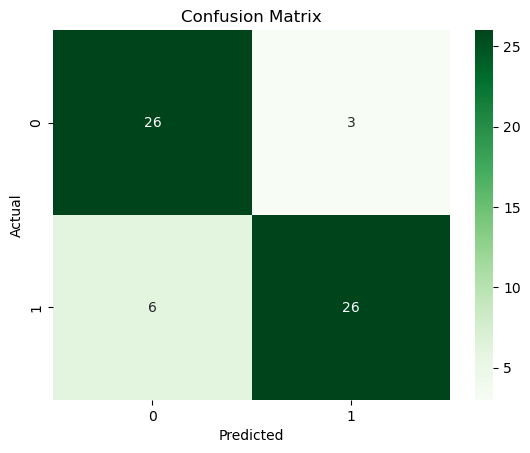

In [35]:
# Create a confusion matrix

lrcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix

sns.heatmap(lrcm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Narration:

The classification model correctly diagnosed 26 patients as not having heart disease, but it wrongly predicted 6 patients as not having heart disease when they actually did. Additionally, 3 patients without heart disease were incorrectly diagnosed as having the condition. The model correctly identified 26 patients with heart disease.


In [36]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)


print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC-ROC: 0.8685344827586206


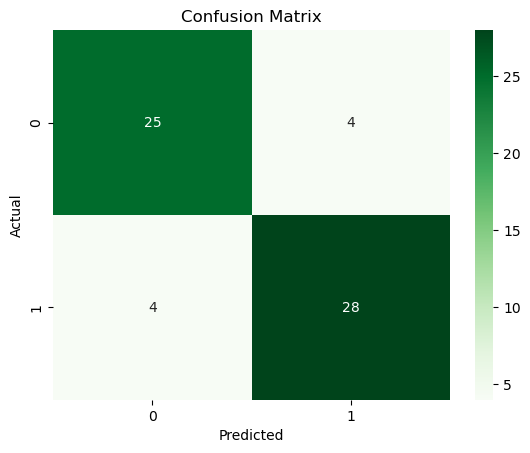

In [37]:
# Create a confusion matrix

rcm = confusion_matrix(y_test, rfy_pred)


# Visualize the confusion matrix

sns.heatmap(rcm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Narration:

The classification model was able to accurately predict that 25 patients did not have heart disease. However, it wrongly predicted 4 patients as not having heart disease when they actually did, and incorrectly diagnosed 4 patients without the condition as having heart disease. It correctly identified 28 patients with heart disease. This model performed better than the Logistic Regression model.

In [38]:
# Model building
# Support Vector Machine

svc = SVC()
svc.fit(X_train, y_train)
svy_pred = svc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, svy_pred))
print("Precision:", precision_score(y_test, svy_pred))
print("Recall:", recall_score(y_test, svy_pred))
print("F1-score:", f1_score(y_test, svy_pred))
print("AUC-ROC:", roc_auc_score(y_test, svy_pred))

Logistic Regression
Accuracy: 0.7213114754098361
Precision: 0.7142857142857143
Recall: 0.78125
F1-score: 0.7462686567164178
AUC-ROC: 0.7182112068965517


### Narration:

The classification model was able to accurately predict that 24 patients did not have heart disease. However, it wrongly predicted 5 patients as not having heart disease when they actually did, and incorrectly diagnosed 5 patients without the condition as having heart disease. It correctly identified 27 patients with heart disease. This model performed better than the Logistic Regression model.

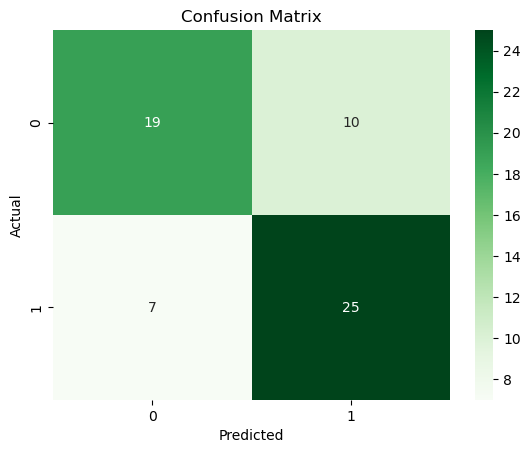

In [39]:
# Creating a confusion matrix. 

svc = confusion_matrix(y_test, svy_pred)

#Visualize the confusion matrix

sns.heatmap(svc, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Narration:

This classification model predicted 19 patients correctly as not having heart disease, while it wrongly predicted 7 patients as not having heart disease when they actually did. It also incorrectly diagnosed 10 patients without heart disease as having the condition. Additionally, it correctly diagnosed 25 patients as having heart disease. However, this model performed worse than both the Logistic Regression and Random Forest models.

In [40]:
# 8 Machine Learing Algorithms will be applied to the dataset


classifiers =  [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Randowm Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
               [SGDClassifier(), 'SGD Classifier'], 
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'], 
               [DecisionTreeClassifier(random_state= 42), 'Decision tree'], 
               [LogisticRegression(), 'Logistic Regression']
               ]

In [41]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}



for classifier in classifiers:
    
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + '%'])
    
    
    if model_name != classifiers[-1][1]:
        print('')

In [42]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Randowm Forest': ['86.89%'],
 'K-Nearest Neighbours': ['78.69%'],
 'SGD Classifier': ['83.61%'],
 'SVC': ['72.13%'],
 'Naive Bayes': ['88.52%'],
 'Decision tree': ['78.69%'],
 'Logistic Regression': ['85.25%']}

In [43]:
print ('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Randowm Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,86.89%,78.69%,83.61%,72.13%,88.52%,78.69%,85.25%


In [44]:
print ('Precision')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Randowm Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,87.5%,85.19%,77.5%,71.43%,93.1%,85.19%,89.66%


In [45]:
print ('Recall')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Randowm Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,78.12%,87.5%,71.88%,96.88%,78.12%,84.38%,71.88%,81.25%


In [46]:
print ('ROC Score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Randowm Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,82.17%,86.85%,79.04%,82.92%,71.82%,88.74%,79.04%,85.45%


### Conclusion:


To analyze the results, we need to focus on the different metrics provided: Accuracy, Precision, Recall, and ROC Score. These metrics inform us about the performance of each classifier. Let's look at each metric and explain their importance briefly:

1. Accuracy: It is the ratio of correct predictions to the total predictions made. A higher accuracy score indicates better performance.
2. Precision: It's the fraction of true positives among the positive predictions. A model with higher precision has a lower rate of false-positive predictions.
3. Recall: Also known as sensitivity or the True Positive rate, it measures the proportion of True Positives out of the Actual Positives. Higher recall means fewer False Negatives.
4. ROC Score: The Receiver Operating Characteristic (ROC) Score measures the trade-off between True Positive rate (recall) and False Positive rate. A higher ROC Score indicates better performance in distinguishing between Positive and Negative classes.

From the given data, we can make the following observations:

1. Naive Bayes has the highest accuracy at 88.52%, followed by Logistic Regression at 85.25%, and Random Forest at 86.89%.
2. Naive Bayes also has the highest precision at 93.1% and the third-highest recall at 84.38%.
3. The Random Forest classifier has the second-highest precision at 87.5% and the highest recall rate at 87.5%.
4. With respect to ROC Score, Naive Bayes performs best with 88.74%, and Random Forest follows with 86.85%.

The best model depends on the specific use case and priorities of the prediction problem. If precision is of utmost importance, where False Positives need to be minimized, then Naive Bayes would be the best choice. However, if a balanced performance across recall and precision is desired, the Random Forest classifier might be more suitable, as it has a higher recall rate at 87.5% and a reasonably high precision at 87.5%, along with an accuracy of 86.89%.

In summary, based on the provided metrics, Naive Bayes and Random Forest classifiers seem to be the top contenders for the best-performing model. The specific choice between the two would depend on the context of the problem and whether high precision or balanced performance across precision and recall is considered more important.